In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

file_path = "AirQualityUCI_copy.csv"

df = pd.read_csv(file_path)



In [42]:
# Step 2: Check for Missing Values
df.isnull().sum()



CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [51]:
print(df.duplicated().sum())

31


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(13)
memory usage: 950.4 KB


In [44]:

# Step 5: Dropping Correlated Columns
correlation_matrix = df.corr()
threshold = 0.9  # Set a threshold
drop_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            drop_columns.add(colname)
df.drop(columns=drop_columns, inplace=True)



In [53]:
print(df.duplicated().sum())

31


In [47]:
df.isnull().sum()

CO(GT)          0
PT08.S1(CO)     0
NMHC(GT)        0
C6H6(GT)        0
NOx(GT)         0
PT08.S3(NOx)    0
NO2(GT)         0
PT08.S4(NO2)    0
T               0
RH              0
AH              0
dtype: int64

In [25]:
# Assuming 'df' is your DataFrame and the targets are 'CO(GT)', 'C6H6(GT)', and 'NOx(GT)'
target_columns = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)']

# Separate features and multiple target columns
features = df.drop(target_columns, axis=1)  # Exclude the target columns
targets = df[target_columns]  # Multiple target columns

# Step 6: Scaling - Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)  # Fit and transform the features

# Convert the scaled features back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(scaled_df, targets, test_size=0.2, random_state=42)



In [35]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training set
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model's performance for each target
print("Linear Regression Model Performance:")
for i, target in enumerate(target_columns):
    print(f"Target: {target}")
    print(f"R^2 Score: {r2_score(y_test[target], y_pred[:, i])}")
    print(f"Mean Squared Error: {mean_squared_error(y_test[target], y_pred[:, i])}")
    print('-' * 50)



Linear Regression Model Performance:
Target: CO(GT)
R^2 Score: 0.6971855605925947
Mean Squared Error: 0.7669313417160926
--------------------------------------------------
Target: C6H6(GT)
R^2 Score: 0.8990395900633236
Mean Squared Error: 5.915034860494433
--------------------------------------------------
Target: NOx(GT)
R^2 Score: 0.7386729435821853
Mean Squared Error: 11731.74315147854
--------------------------------------------------


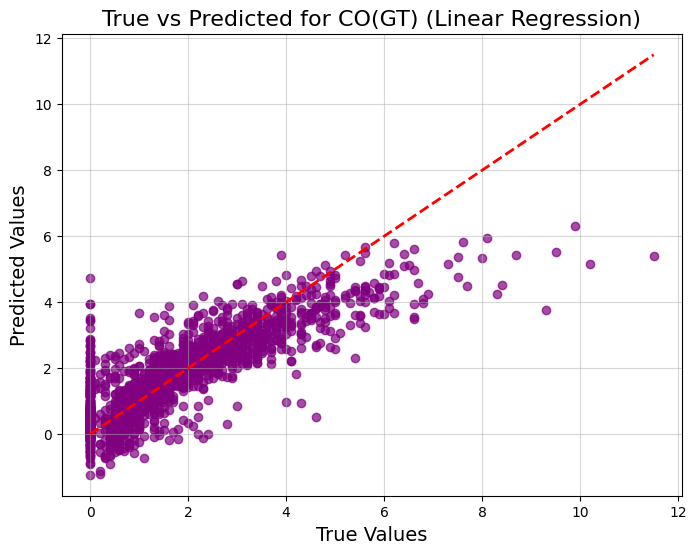

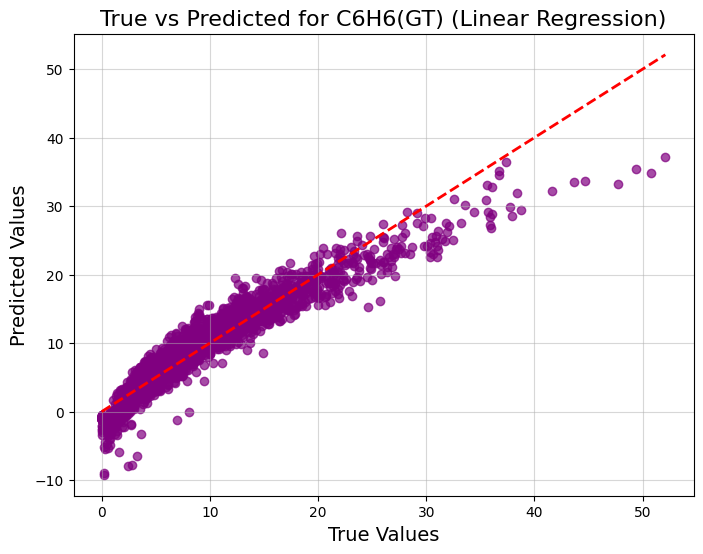

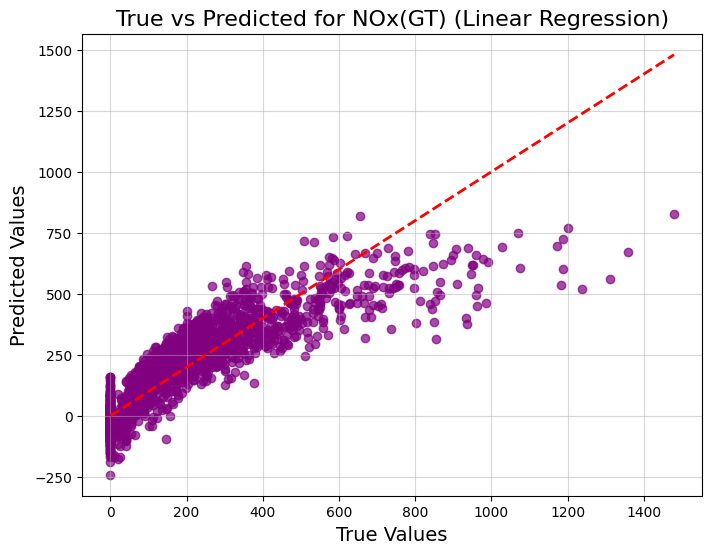

In [27]:

# Plot the true vs predicted values for each target
for i, target in enumerate(target_columns):
    plt.figure(figsize=(8, 6))
    
    # Scatter plot for true vs predicted values
    plt.scatter(y_test[target], y_pred[:, i], alpha=0.7, color='purple')
    
    # Add a diagonal reference line
    plt.plot([y_test[target].min(), y_test[target].max()],
             [y_test[target].min(), y_test[target].max()],
             color='red', linestyle='--', linewidth=2)
    
    # Set plot labels and title
    plt.title(f'True vs Predicted for {target} (Linear Regression)', fontsize=16)
    plt.xlabel('True Values', fontsize=14)
    plt.ylabel('Predicted Values', fontsize=14)
    plt.grid(alpha=0.5)
    
    plt.show()

In [36]:
from sklearn.ensemble import RandomForestRegressor


# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance for each target
print("Model Performance:")
for i, target in enumerate(target_columns):
    print(f"Target: {target}")
    print(f"R^2 Score: {r2_score(y_test[target], y_pred[:, i])}")
    print(f"Mean Squared Error: {mean_squared_error(y_test[target], y_pred[:, i])}")
    print('-' * 50)


Model Performance:
Target: CO(GT)
R^2 Score: 0.8405994747847371
Mean Squared Error: 0.40371013652066245
--------------------------------------------------
Target: C6H6(GT)
R^2 Score: 0.952573390362277
Mean Squared Error: 2.778614404380343
--------------------------------------------------
Target: NOx(GT)
R^2 Score: 0.9140029655120665
Mean Squared Error: 3860.660791235625
--------------------------------------------------


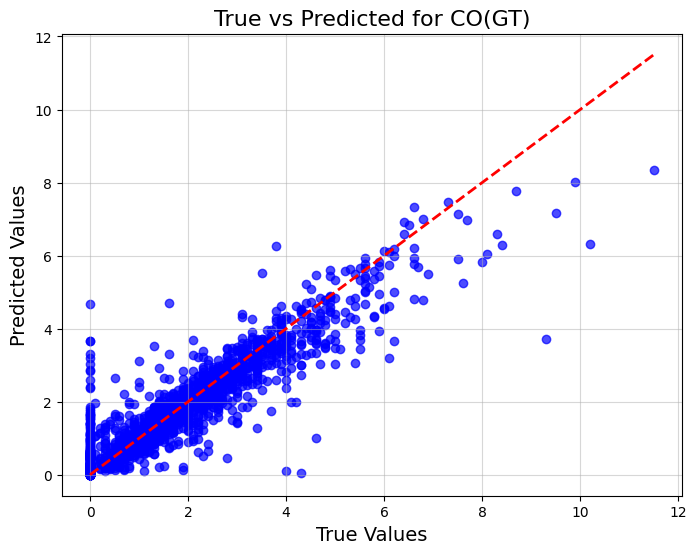

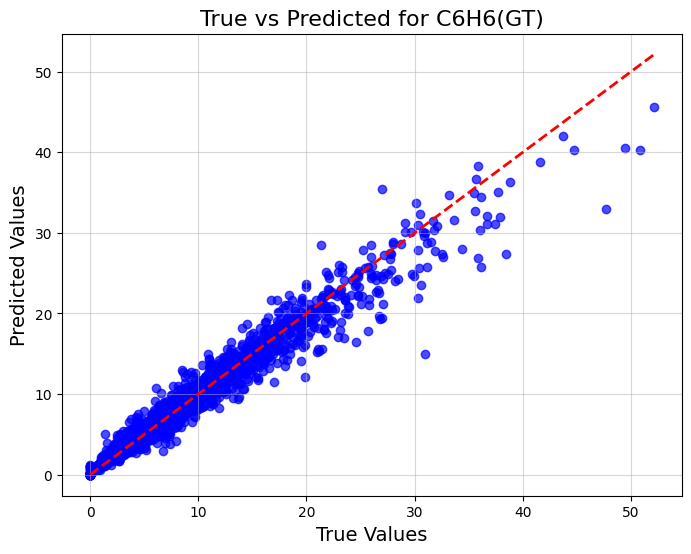

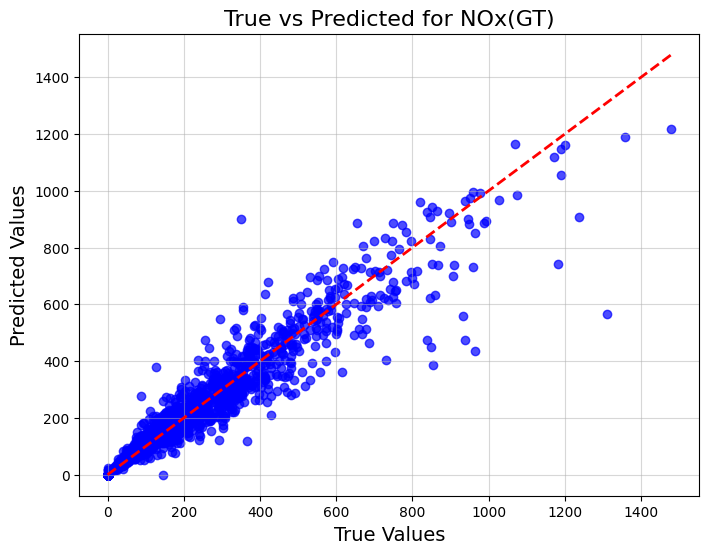

In [37]:
# Plot the true vs. predicted values for each target
for i, target in enumerate(target_columns):
    plt.figure(figsize=(8, 6))
    
    # Scatter plot for true vs predicted values
    plt.scatter(y_test[target], y_pred[:, i], alpha=0.7, color='blue')
    
    # Add a diagonal reference line
    plt.plot([y_test[target].min(), y_test[target].max()],
             [y_test[target].min(), y_test[target].max()],
             color='red', linestyle='--', linewidth=2)
    
    # Set plot labels and title
    plt.title(f'True vs Predicted for {target}', fontsize=16)
    plt.xlabel('True Values', fontsize=14)
    plt.ylabel('Predicted Values', fontsize=14)
    plt.grid(alpha=0.5)
    
    plt.show()


In [30]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training set
dt_model.fit(X_train, y_train)

# Predict the target variables on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model's performance for each target
print("Model Performance:")
for i, target in enumerate(target_columns):
    print(f"Target: {target}")
    print(f"R^2 Score: {r2_score(y_test[target], y_pred[:, i])}")
    print(f"Mean Squared Error: {mean_squared_error(y_test[target], y_pred[:, i])}")
    print('-' * 50)




Model Performance:
Target: CO(GT)
R^2 Score: 0.6830593436432477
Mean Squared Error: 0.8027084946799232
--------------------------------------------------
Target: C6H6(GT)
R^2 Score: 0.8639810466827269
Mean Squared Error: 7.969033119658121
--------------------------------------------------
Target: NOx(GT)
R^2 Score: 0.8474514053651949
Mean Squared Error: 6848.356824994065
--------------------------------------------------


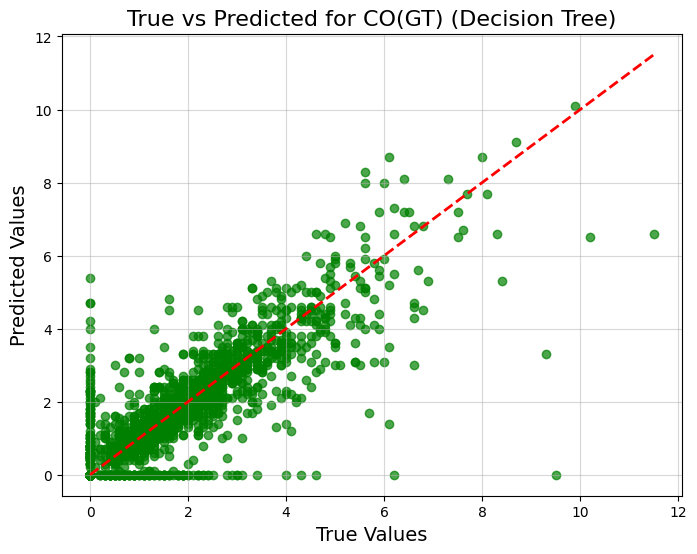

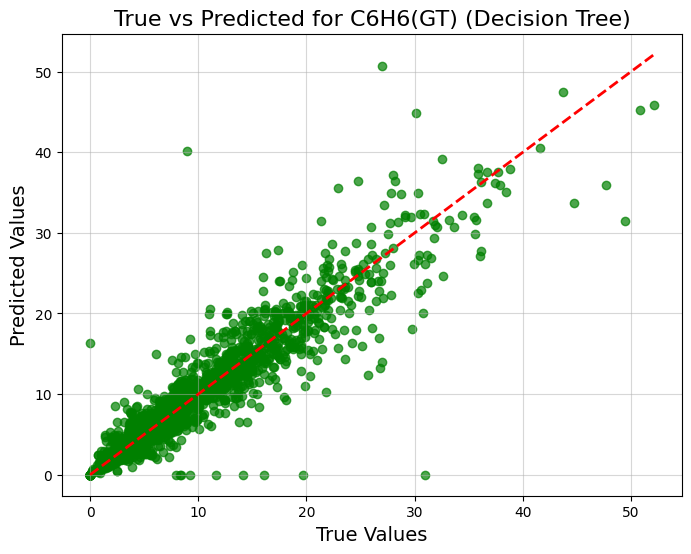

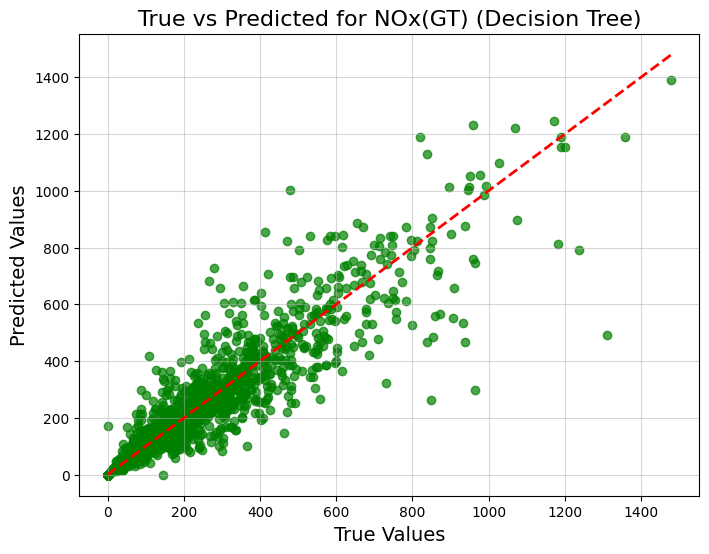

In [31]:
# Plot the true vs predicted values for each target
for i, target in enumerate(target_columns):
    plt.figure(figsize=(8, 6))
    
    # Scatter plot for true vs predicted values
    plt.scatter(y_test[target], y_pred[:, i], alpha=0.7, color='green')
    
    # Add a diagonal reference line
    plt.plot([y_test[target].min(), y_test[target].max()],
             [y_test[target].min(), y_test[target].max()],
             color='red', linestyle='--', linewidth=2)
    
    # Set plot labels and title
    plt.title(f'True vs Predicted for {target} (Decision Tree)', fontsize=16)
    plt.xlabel('True Values', fontsize=14)
    plt.ylabel('Predicted Values', fontsize=14)
    plt.grid(alpha=0.5)
    
    plt.show()

In [ ]:
from sklearn.svm import SVR


# Initialize the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Default settings

# Train the model for each target
y_pred = []
print("SVR Model Performance:")

for target in target_columns:
    # Train SVR for each target individually
    svr_model.fit(X_train, y_train[target])
    
    # Predict for the test set
    y_pred_target = svr_model.predict(X_test)
    y_pred.append(y_pred_target)
    
    # Evaluate the model's performance
    print(f"Target: {target}")
    print(f"R^2 Score: {r2_score(y_test[target], y_pred_target)}")
    print(f"Mean Squared Error: {mean_squared_error(y_test[target], y_pred_target)}")
    print('-' * 50)




SVR Model Performance:
Target: CO(GT)
R^2 Score: 0.8459686671367131
Mean Squared Error: 0.3901117034258235
--------------------------------------------------
Target: C6H6(GT)
R^2 Score: 0.9539568875820641
Mean Squared Error: 2.6975585302057947
--------------------------------------------------
Target: NOx(GT)
R^2 Score: 0.6518295057693972
Mean Squared Error: 15630.401487039904
--------------------------------------------------


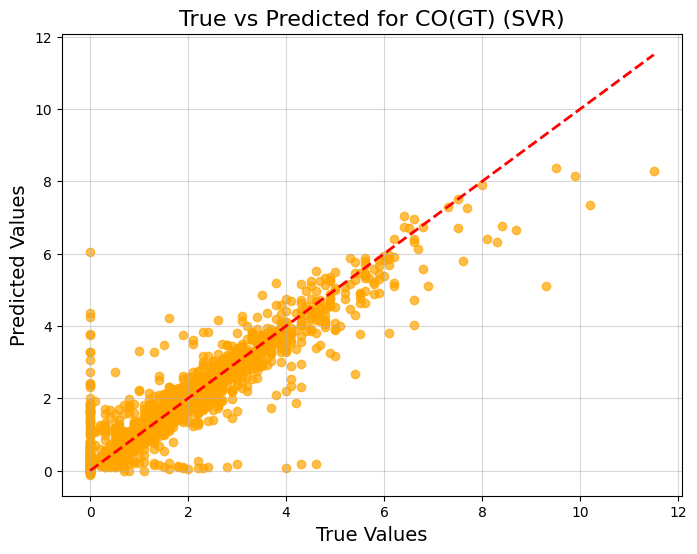

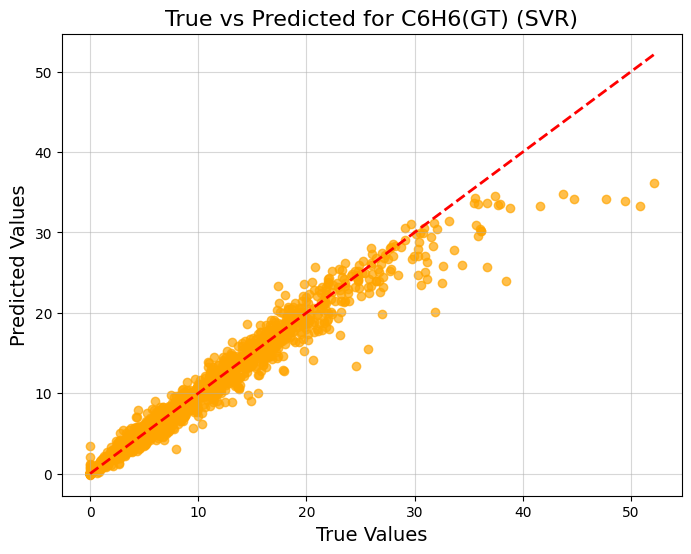

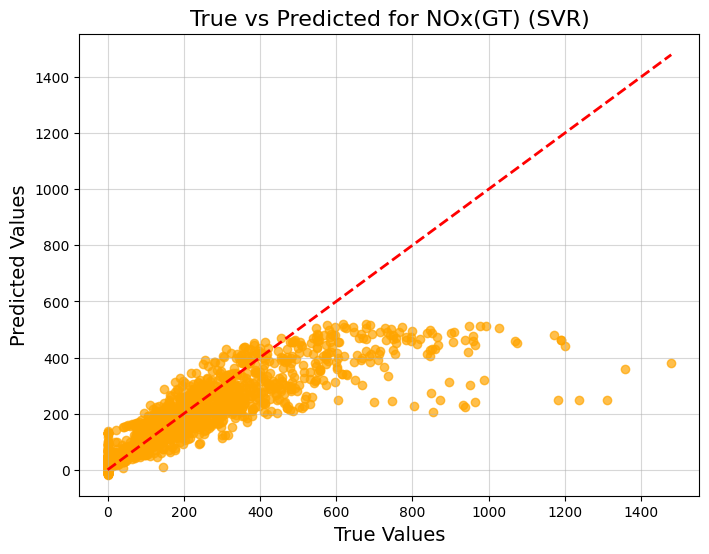

In [33]:
# Convert the list of predictions to a NumPy array
y_pred = np.array(y_pred).T

# Plot the true vs predicted values for each target
for i, target in enumerate(target_columns):
    plt.figure(figsize=(8, 6))
    
    # Scatter plot for true vs predicted values
    plt.scatter(y_test[target], y_pred[:, i], alpha=0.7, color='orange')
    
    # Add a diagonal reference line
    plt.plot([y_test[target].min(), y_test[target].max()],
             [y_test[target].min(), y_test[target].max()],
             color='red', linestyle='--', linewidth=2)
    
    # Set plot labels and title
    plt.title(f'True vs Predicted for {target} (SVR)', fontsize=16)
    plt.xlabel('True Values', fontsize=14)
    plt.ylabel('Predicted Values', fontsize=14)
    plt.grid(alpha=0.5)
    
    plt.show()